# LMIs and Semidefinite Programming

A semidefinite program (SDP) is an optimization problem with linear objective and LMI and linear equality constraints:  

$$\text{Minimize }\ c^Tx$$
$$\text{subject to }\ F_0+x_1F_1+\cdot\cdot\cdot+x_nF_n\ge0$$
$$Ax=b$$

In [0]:
import numpy as np
import cvxpy as cvx
import cvxopt as co
import matplotlib.pyplot as plt

## Maximum-Volume Ellipsoid Problem

> A university has decided to construct a grassy (elliptical) oval in an area bounded by existing buildings.  Unfortunately, the area is bounded by existing construction, and is not itself elliptical  The available is bounded by a quadrilateral with vertices (0,0), (0,100), (150,150) and (300,0), where all distances are in metres.  Determine the area of the largest elliptical garden that will fit in the space bounded by these vertices, its center and the directions of its semi-major and semi-minor axes.
>
><b>HINTS:</b>
>
> * The <code>log_det</code> and <code>norm</code> functions in CVXPY will be helpful.  You can use the syntax X = <code>Variable((n,n) PSD = true)</code> to create semidefinite matrices.
> * The CVXOPT SDP solver is not well equipped to handle a $\log \det$ objective with such large lengths as the constraints in this problem.  You may need to scale the lengths by 100, then scale them up after solving the problem.

In [3]:
## PRE-CLASS ATTEMPT

# Objective function: c.T * x
# Subject to: F0 + x1.F1 + .. + xn.Fn
# Equality constraint: Ax + b

# The arrays that limit the elliptical shape after normalizing by 100
edges = np.array([[-1/3, 1], [1,1], [0,1], [1,0]])
points = np.array([[1], [0], [0], [3]])

# Variable((n, n), PSD=True) instead of Semidef(n)
Q = cp.Variable((2, 2), PSD=True)
constraints = [Q >> 0] 
constraints += [Q * edges[i] - points[i] >= 0 for i in range(4)]

obj = cvx.Maximize(cvx.log_det(Q))

cvx.Problem(obj, constraints)

Problem(Maximize(Expression(CONCAVE, NONNEGATIVE, ())), [PSD(Expression(AFFINE, UNKNOWN, (2, 2))), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Constant(CONSTANT, ZERO, ()))])

In [4]:
## SOLUTION FROM CLASS SESSION [Prof. Shekhar]

# Define the vertices
vert_x = 100 * np.array([0, 0, 1.5, 3, 0])
vert_y = 100 * np.array([0, 1, 1.5, 0, 0])

# Define the lines for the boundary of the oval
A = np.array([[-1 , 0], [0 , -1], [-1/3 , 1], [1, 1]])
b = 100 * np.array([[0, 0, 1, 3]]).T

# Define the variables for the ellipse {c + Ex}
c = cvx.Variable((2,1))
E = cvx.Variable((2,2), PSD = True)

# Define the objective function
obj = cvx.Maximize(cvx.log_det(E))

# Define the constraints
con = [A[i] * c + cvx.norm(A[i] * E, 2) <= b[i] for i in range(0, len(b))]

# Solve the optimization problem
prob = cvx.Problem(obj, con)
prob.solve(verbose=True)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 73
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 27, constraints m = 53
Cones:	primal zero / dual free vars: 15
	linear vars: 4
	soc vars: 12, soc blks: 4
	sd vars: 16, sd blks: 3
	exp vars: 6, dual exp vars: 0
Setup time: 1.94e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6.49e+19  4.14e+19  9.98e-01 -1.60e+22 -1.38e+19  5.62e+21  2.17e-02 
   100| 3.94e-03  5.01e-03  1.43e-02 -8.64e+00 -8.90e+00  8.68e-15  3.55e-02 
   200| 2.49e-

8.857946242481223

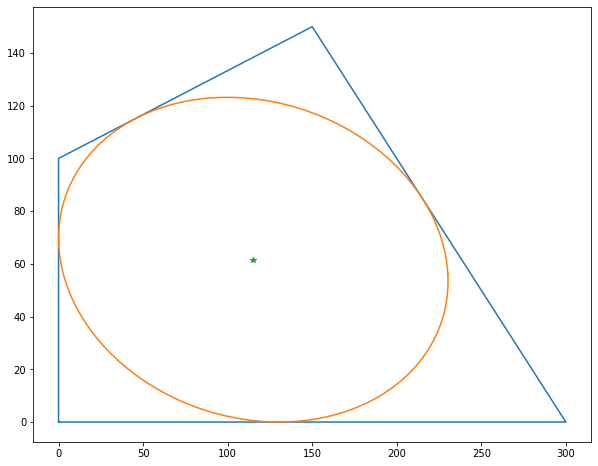

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(vert_x, vert_y)

# Create ellipse
points = np.arange(0,101)*2*np.pi/100
e_points = (np.kron(c.value,np.ones([1,101])) +  E.value @ [np.cos(points),np.sin(points)])
plt.plot(e_points[0].T,e_points[1].T)
plt.plot(c.value[0],c.value[1],'*')
evalue, evec = np.linalg.eigvals(E.value)

plt.show()